# Data preprocessing

In [3]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
#!pip install gensim

In [5]:
from gensim.models import word2vec

In [6]:
current_directory = os.getcwd()
print(current_directory)

c:\Users\seowoo kim\Desktop\노나없


In [7]:
# Japan first_read japan data
data_j = pd.read_csv("./intern_review_japan_only_sentences.csv")
data_j.head()

,SeparatedSentences
0,I think I've seen it six times.It's kind of li...
1,Is it because of the taxi driver's movie that ...
2,It's a very good movie that warms your heart a...
3,"After I finished watching it, I was filled wit..."
4,The story is about friendship across generatio...


# Preprocessing Strategy

1. Expand contractions : pycontractions
2. lowercase
3. change numbers to words : inflect
4. Remove Punctuations : '!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'
5. Remove remained emoji, japanese, chinese, korean words
6. PoS_tagging: from nltk import pos_tag
7. If needed, remove PRP, TO, DT, etc. 
8. Stemming: PorterStemmer
9. Find out average sentence length
10. Wordcloud


In [8]:
# Pycontractions doesn't work due to dependency issue. I just modulized it by myself.

from contractions import expand_contractions

contracted_list = []
Sentences = data_j['SeparatedSentences'].copy()

for sentence in Sentences:
    expanded_sentence = expand_contractions(sentence)
    contracted_list.append(expanded_sentence)


In [9]:
contracted_list[:5]

['I think i have seen it six times.it is kind of like playing the role of a good grandpa gentleman (^^) who does not seem to be De Niro who played scary roles such as Alpacino.',
 "Is it because of the taxi driver's movie that i am going to be a driver?",
 'it is a very good movie that warms your heart and motivates you!',
 'After I finished watching it, I was filled with happiness.All the characters are attractive and live their lives with all their might.I also want to improve my work and private life from tomorrow.It was a good movie.',
 'The story is about friendship across generations.Retired gentleman Ben will join a new apparel manufacturer led by Jules of Barricari as an intern.Ben is the ideal combination of wanting to be such an old gentleman.it is refreshing even after watching it, and I recommend it when you want to feel positive.']

In [10]:
# Transform all sentences into lower case! easy!

contracted_list = [text.lower() for text in contracted_list]

In [11]:
contracted_list[:5]

['i think i have seen it six times.it is kind of like playing the role of a good grandpa gentleman (^^) who does not seem to be de niro who played scary roles such as alpacino.',
 "is it because of the taxi driver's movie that i am going to be a driver?",
 'it is a very good movie that warms your heart and motivates you!',
 'after i finished watching it, i was filled with happiness.all the characters are attractive and live their lives with all their might.i also want to improve my work and private life from tomorrow.it was a good movie.',
 'the story is about friendship across generations.retired gentleman ben will join a new apparel manufacturer led by jules of barricari as an intern.ben is the ideal combination of wanting to be such an old gentleman.it is refreshing even after watching it, and i recommend it when you want to feel positive.']

In [12]:
#! pip install inflect

In [13]:
# Change numbers into words
import inflect
p = inflect.engine()

def convert_number(text):
    def replace_number(match):
        number = match.group()
        return p.number_to_words(number)
    
    converted_text = re.sub(r'\d+', replace_number, text)
    return converted_text

inflected_list = []
inflected_list = [convert_number(text) for text in contracted_list]         

In [14]:
# Remove punctuations
rm_punctionations = inflected_list.copy()

def rm_punct(text):
    cleaned_text = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]', ' ', text)
    return cleaned_text

rm_punctionations = [rm_punct(text) for text in rm_punctionations]

In [15]:
rm_punctionations[:5]

['i think i have seen it six times it is kind of like playing the role of a good grandpa gentleman      who does not seem to be de niro who played scary roles such as alpacino ',
 'is it because of the taxi driver s movie that i am going to be a driver ',
 'it is a very good movie that warms your heart and motivates you ',
 'after i finished watching it  i was filled with happiness all the characters are attractive and live their lives with all their might i also want to improve my work and private life from tomorrow it was a good movie ',
 'the story is about friendship across generations retired gentleman ben will join a new apparel manufacturer led by jules of barricari as an intern ben is the ideal combination of wanting to be such an old gentleman it is refreshing even after watching it  and i recommend it when you want to feel positive ']

In [16]:
# remove japanese, korean, chinese words

def only_english(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    return cleaned_text

rm_punctionations = [only_english(text) for text in rm_punctionations]

In [17]:
# POS_tagging

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# 필요한 NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Text를 단어 토큰과 POS 태그로 변환
def pos_tagging(text):
    word_tokens = word_tokenize(text)
    return pos_tag(word_tokens)

tag_sentence = rm_punctionations.copy()

tag_sentence = [pos_tagging(text) for text in tag_sentence]


[nltk_data] Downloading package punkt to C:\Users\seowoo
[nltk_data]     kim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\seowoo kim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [18]:
tag_sentence[:5]

[[('i', 'JJ'),
  ('think', 'VBP'),
  ('i', 'NNS'),
  ('have', 'VBP'),
  ('seen', 'VBN'),
  ('it', 'PRP'),
  ('six', 'CD'),
  ('times', 'NNS'),
  ('it', 'PRP'),
  ('is', 'VBZ'),
  ('kind', 'NN'),
  ('of', 'IN'),
  ('like', 'IN'),
  ('playing', 'VBG'),
  ('the', 'DT'),
  ('role', 'NN'),
  ('of', 'IN'),
  ('a', 'DT'),
  ('good', 'JJ'),
  ('grandpa', 'NN'),
  ('gentleman', 'NN'),
  ('who', 'WP'),
  ('does', 'VBZ'),
  ('not', 'RB'),
  ('seem', 'VB'),
  ('to', 'TO'),
  ('be', 'VB'),
  ('de', 'VBN'),
  ('niro', 'FW'),
  ('who', 'WP'),
  ('played', 'VBD'),
  ('scary', 'JJ'),
  ('roles', 'NNS'),
  ('such', 'JJ'),
  ('as', 'IN'),
  ('alpacino', 'NN')],
 [('is', 'VBZ'),
  ('it', 'PRP'),
  ('because', 'IN'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('taxi', 'NN'),
  ('driver', 'NN'),
  ('s', 'VBD'),
  ('movie', 'NN'),
  ('that', 'IN'),
  ('i', 'NN'),
  ('am', 'VBP'),
  ('going', 'VBG'),
  ('to', 'TO'),
  ('be', 'VB'),
  ('a', 'DT'),
  ('driver', 'NN')],
 [('it', 'PRP'),
  ('is', 'VBZ'),
  ('a', 'DT'),
 

In [15]:
#nltk.download('tagsets')
#nltk.help.upenn_tagset('WP')

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Remove IN, PRP, CC, PRP$, DT, TO, FW, WP
def remove_specific_tags(tagged_sentence, tags_to_remove):
    return [word for word, tag in tagged_sentence if tag not in tags_to_remove]

tags_to_remove = {"IN", "PRP", "CC", "PRP$", "DT", "TO", "FW", "WP", "WRB"}

tag_rm = tag_sentence.copy()
tag_rm = [remove_specific_tags(text, tags_to_remove) for text in tag_rm]

In [20]:
tag_rm_sentence = [pos_tag(sentence) for sentence in tag_rm]
tag_rm_sentence[:5]

[[('i', 'JJ'),
  ('think', 'VBP'),
  ('i', 'NNS'),
  ('have', 'VBP'),
  ('seen', 'VBN'),
  ('six', 'CD'),
  ('times', 'NNS'),
  ('is', 'VBZ'),
  ('kind', 'NN'),
  ('playing', 'VBG'),
  ('role', 'NN'),
  ('good', 'JJ'),
  ('grandpa', 'NN'),
  ('gentleman', 'NN'),
  ('does', 'VBZ'),
  ('not', 'RB'),
  ('seem', 'VB'),
  ('be', 'VB'),
  ('de', 'FW'),
  ('played', 'FW'),
  ('scary', 'JJ'),
  ('roles', 'NNS'),
  ('such', 'JJ'),
  ('alpacino', 'NN')],
 [('is', 'VBZ'),
  ('taxi', 'JJ'),
  ('driver', 'RB'),
  ('s', 'JJ'),
  ('movie', 'NN'),
  ('i', 'NN'),
  ('am', 'VBP'),
  ('going', 'VBG'),
  ('be', 'VB'),
  ('driver', 'RB')],
 [('is', 'VBZ'),
  ('very', 'RB'),
  ('good', 'JJ'),
  ('movie', 'NN'),
  ('warms', 'NNS'),
  ('heart', 'NN'),
  ('motivates', 'NNS')],
 [('i', 'NN'),
  ('finished', 'VBD'),
  ('watching', 'VBG'),
  ('i', 'NN'),
  ('was', 'VBD'),
  ('filled', 'VBN'),
  ('happiness', 'RB'),
  ('all', 'DT'),
  ('characters', 'NNS'),
  ('are', 'VBP'),
  ('attractive', 'JJ'),
  ('live', 'JJ'

In [21]:
# Lemmatize & remove stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import wordnet as wn

nltk.download('wordnet')

# inflect engine initialize
p = inflect.engine()

# WordNetLemmatizer initialize
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return None

def singularize_and_lemmatize(tagged_words):
    new_words = []
    
    for word, tag in tagged_words:
        if tag.startswith('N'):
            singular_word = p.singular_noun(word)
            if singular_word:
                new_words.append(singular_word)
            else:
                new_words.append(word)
        else:
            wn_tag = get_wordnet_pos(tag)
            if wn_tag is not None:
                lemma_word = lemmatizer.lemmatize(word, wn_tag)
                new_words.append(lemma_word)
            else:
                new_words.append(word)
    
    return new_words

[nltk_data] Downloading package wordnet to C:\Users\seowoo
[nltk_data]     kim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
processed_sentences = [singularize_and_lemmatize(sentence) for sentence in tag_rm_sentence]

In [23]:
processed_sentences

[['i',
  'think',
  'i',
  'have',
  'see',
  'six',
  'time',
  'be',
  'kind',
  'play',
  'role',
  'good',
  'grandpa',
  'gentleman',
  'do',
  'not',
  'seem',
  'be',
  'de',
  'played',
  'scary',
  'role',
  'such',
  'alpacino'],
 ['be', 'taxi', 'driver', 's', 'movie', 'i', 'be', 'go', 'be', 'driver'],
 ['be', 'very', 'good', 'movie', 'warm', 'heart', 'motivate'],
 ['i',
  'finish',
  'watch',
  'i',
  'be',
  'fill',
  'happiness',
  'all',
  'character',
  'be',
  'attractive',
  'live',
  'life',
  'might',
  'i',
  'also',
  'want',
  'improve',
  'work',
  'private',
  'life',
  'tomorrow',
  'be',
  'good',
  'movie'],
 ['story',
  'be',
  'friendship',
  'generation',
  'retire',
  'gentleman',
  'ben',
  'will',
  'join',
  'new',
  'apparel',
  'manufacturer',
  'lead',
  'jule',
  'barricari',
  'intern',
  'ben',
  'be',
  'ideal',
  'combination',
  'want',
  'be',
  'such',
  'old',
  'gentleman',
  'be',
  'refresh',
  'even',
  'watch',
  'i',
  'recommend',
  

In [63]:
# stopwords
def remove_verbs(words):
    verbs_to_remove = {"am", "be", "are", "was", "were", "being", "is"}
    filtered_words = [word for word in words if word not in verbs_to_remove]
    return filtered_words

processed_sentences_no_stopwords = [remove_verbs(word) for word in processed_sentences]

In [75]:
processed_sentences_no_stopwords

[['i',
  'think',
  'i',
  'have',
  'see',
  'six',
  'time',
  'kind',
  'play',
  'role',
  'good',
  'grandpa',
  'gentleman',
  'do',
  'not',
  'seem',
  'de',
  'played',
  'scary',
  'role',
  'such',
  'alpacino'],
 ['taxi', 'driver', 's', 'movie', 'i', 'go', 'driver'],
 ['very', 'good', 'movie', 'warm', 'heart', 'motivate'],
 ['i',
  'finish',
  'watch',
  'i',
  'fill',
  'happiness',
  'all',
  'character',
  'attractive',
  'live',
  'life',
  'might',
  'i',
  'also',
  'want',
  'improve',
  'work',
  'private',
  'life',
  'tomorrow',
  'good',
  'movie'],
 ['story',
  'friendship',
  'generation',
  'retire',
  'gentleman',
  'ben',
  'will',
  'join',
  'new',
  'apparel',
  'manufacturer',
  'lead',
  'jule',
  'barricari',
  'intern',
  'ben',
  'ideal',
  'combination',
  'want',
  'such',
  'old',
  'gentleman',
  'refresh',
  'even',
  'watch',
  'i',
  'recommend',
  'want',
  'feel',
  'positive'],
 ['i', 'honestly', 'think', 'would', 'right', 'heartful', 'seri

In [76]:
# final..refine!

def replace_words(sentence):
    replacements = {
        r'\binternben\b': ['intern', 'ben'],
        r'\bexperiencesben\b': ['experience', 'ben'],
        r'\bbeingben\b': ['being', 'ben'],
        r'\bbentwo\b': ['ben', 'two'],
        r'\bbens\b': ['ben'],
        r'\bitben\b': ['it', 'ben'],
        r'\bheartben\b': ['heart', 'ben'],
        r'\botherben\b': ['other', 'ben'],
        r'\bbentheir\b': ['ben', 'their'],
        r'\bfamilyben\b': ['family', 'ben'],
        r'\bfunben\b': ['fun', 'ben'],
        r'\binternrobert\b': ['intern', 'robert'],
        r'\buprobert\b': ['up', 'robert'],
        r'\brealisticrobert\b': ['realistic', 'robert'],
        r'\btemperrobert\b': ['temper', 'robert'],
        r'\bplacerobert\b': ['place', 'robert'],
        r'\btimesrobert\b': ['time', 'robert'],
        r'\bniros\b': ['niro'],
        r'\bdeniro\b': ['niro'],
        r'\bniroi\b': ['niro', 'I'],
        r'\bmyershe\b': ['she'],
        r'\bmyersworking\b': ['working'],
        r'\banhathaway\b': ['hathaway'],
        r'\bsceneanhathaway\b': ['scene', 'hathaway'],
        r'\banhathawayhis\b': ['hathaway', 'his'],
        r'\bhathawayde\b': ['hathaway', 'de'],
        r'\bhathaways\b': ['hathaway'],
        r'\banhathaways\b': ['hathaway'],
        r'\brottenanhathaway\b': ['rotten', 'hathaway'],
        r'\btherejules\b': ['there', 'jule'],
        r'\bweakjule\b': ['weak', 'jule'],
        r'\bjules\b': ['jule'],
        r'\broutinejule\b': ['routine', 'jule'],
        r'\bagejule\b': ['age', 'jule'],
    }
    for pattern, replacement in replacements.items():
        sentence = re.sub(pattern, ' '.join(replacement), sentence)

    return sentence.split()

modified_sentences = [replace_words(' '.join(sentence)) for sentence in processed_sentences_no_stopwords]

In [65]:
modified_sentences[:5]

[['i',
  'think',
  'i',
  'have',
  'see',
  'six',
  'time',
  'kind',
  'play',
  'role',
  'good',
  'grandpa',
  'gentleman',
  'do',
  'not',
  'seem',
  'de',
  'played',
  'scary',
  'role',
  'such',
  'alpacino'],
 ['taxi', 'driver', 's', 'movie', 'i', 'go', 'driver'],
 ['very', 'good', 'movie', 'warm', 'heart', 'motivate'],
 ['i',
  'finish',
  'watch',
  'i',
  'fill',
  'happiness',
  'all',
  'character',
  'attractive',
  'live',
  'life',
  'might',
  'i',
  'also',
  'want',
  'improve',
  'work',
  'private',
  'life',
  'tomorrow',
  'good',
  'movie'],
 ['story',
  'friendship',
  'generation',
  'retire',
  'gentleman',
  'ben',
  'will',
  'join',
  'new',
  'apparel',
  'manufacturer',
  'lead',
  'jule',
  'barricari',
  'intern',
  'ben',
  'ideal',
  'combination',
  'want',
  'such',
  'old',
  'gentleman',
  'refresh',
  'even',
  'watch',
  'i',
  'recommend',
  'want',
  'feel',
  'positive']]

In [77]:
# remove empty list
modified_sentences = [sentence for sentence in modified_sentences if sentence]

In [81]:
modified_sentences = [remove_verbs(word) for word in modified_sentences]

In [82]:
## remove words with len=1

modified_sentences_2 = modified_sentences.copy()

modified_sentences_2 = [[i for i in word if len(i) > 1] for word in modified_sentences_2]


modified_sentences_2[:10]


[['think',
  'have',
  'see',
  'six',
  'time',
  'kind',
  'play',
  'role',
  'good',
  'grandpa',
  'gentleman',
  'do',
  'not',
  'seem',
  'de',
  'played',
  'scary',
  'role',
  'such',
  'alpacino'],
 ['taxi', 'driver', 'movie', 'go', 'driver'],
 ['very', 'good', 'movie', 'warm', 'heart', 'motivate'],
 ['finish',
  'watch',
  'fill',
  'happiness',
  'all',
  'character',
  'attractive',
  'live',
  'life',
  'might',
  'also',
  'want',
  'improve',
  'work',
  'private',
  'life',
  'tomorrow',
  'good',
  'movie'],
 ['story',
  'friendship',
  'generation',
  'retire',
  'gentleman',
  'ben',
  'will',
  'join',
  'new',
  'apparel',
  'manufacturer',
  'lead',
  'jule',
  'barricari',
  'intern',
  'ben',
  'ideal',
  'combination',
  'want',
  'such',
  'old',
  'gentleman',
  'refresh',
  'even',
  'watch',
  'recommend',
  'want',
  'feel',
  'positive'],
 ['honestly', 'think', 'would', 'right', 'heartful', 'series'],
 ['story',
  'woman',
  'have',
  'family',
  'work

In [83]:
lengths = [len(sentence) for sentence in modified_sentences_2]

# sentence lenths discriptive analysis
median = np.median(lengths)
mean = np.mean(lengths)
percentile_75 = np.percentile(lengths, 75)
percentile_90 = np.percentile(lengths, 90)
percentile_95 = np.percentile(lengths, 95)

print ('median: ', median, 
       'mean: ', mean, 
       'per_75: ', percentile_75, 
       'per_90: ', percentile_90, 
       'per_95: ', percentile_95)

median:  8.0 mean:  10.49862853293125 per_75:  13.0 per_90:  21.0 per_95:  28.0


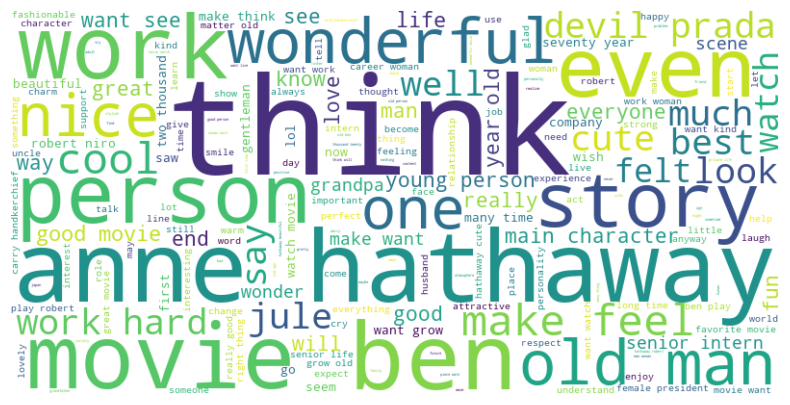

In [80]:
#wordcloud
from wordcloud import WordCloud
text_data_japan = " ".join([" ".join(sentence) for sentence in modified_sentences_2])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data_japan)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [73]:
from collections import Counter
all_words = [word for sentence in modified_sentences_2 for word in sentence]
word_freq= Counter(all_words)
print(word_freq)

Counter({'not': 25721, 'movie': 25361, 'work': 23597, 'have': 23173, 'want': 21230, 'do': 20257, 'ben': 18672, 'good': 18126, 'person': 17492, 'think': 16814, 'hathaway': 15249, 'robert': 13436, 'old': 13366, 'can': 13034, 'watch': 12483, 'that': 12452, 'so': 12053, 'make': 11200, 'see': 10121, 'there': 9376, 'time': 9311, 'life': 9166, 'woman': 8957, 'feel': 8526, 'man': 8098, 'too': 8069, 'very': 7964, 'wonderful': 7782, 'jule': 6950, 'get': 6824, 'story': 6770, 'really': 6698, 'cute': 6579, 'will': 6485, 'also': 6386, 'would': 6284, 'love': 5999, 'cool': 5962, 'thing': 5949, 'one': 5800, 'intern': 5468, 'other': 5400, 'anne': 5394, 'such': 5309, 'even': 5134, 'best': 5128, 'look': 5127, 'could': 5126, 'company': 5010, 'age': 5008, 'nice': 5007, 'go': 4984, 'handkerchief': 4908, 'hard': 4776, 'many': 4766, 'up': 4735, 'gentleman': 4716, 'way': 4679, 'two': 4643, 'young': 4534, 'character': 4497, 'kind': 4420, 'more': 4331, 'play': 4216, 'say': 4200, 'senior': 3920, 'warm': 3897, 'pra

In [33]:
df_word_freq = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
df_word_freq.sort_values(by='Frequency', ascending=False, inplace=True)
df_word_freq

,Word,Frequency
12,not,25721
21,movie,25361
40,work,23597
1,have,23173
38,want,21230
...,...,...
9030,shimachi,1
9029,tezuka,1
9028,osamu,1
9027,giraffe,1


In [34]:
#! pip install openpyxl
df_word_freq.to_excel('word_freq_japan.xlsx')

# word2Vec

In [35]:
from gensim.models import Word2Vec

In [36]:
model = Word2Vec(sentences=modified_sentences_2, vector_size=100, window=28, min_count=2, workers=1)

In [37]:
model.save("word2vec_japan.model")

In [38]:
word_vectors = model.wv

In [39]:
similar_words = word_vectors.most_similar('ben')
print(similar_words)

[('initially', 0.5685513019561768), ('trust', 0.5605815052986145), ('gradually', 0.5467760562896729), ('consult', 0.54152512550354), ('advise', 0.5369197726249695), ('sincerity', 0.5303868055343628), ('concern', 0.511634886264801), ('sincere', 0.5008174180984497), ('witnessed', 0.4921046197414398), ('consideration', 0.4919084906578064)]


In [40]:
similar_words_200 = word_vectors.most_similar('ben', topn=200)
print("Top 100 similar words:", similar_words_200)


Top 100 similar words: [('initially', 0.5685513019561768), ('trust', 0.5605815052986145), ('gradually', 0.5467760562896729), ('consult', 0.54152512550354), ('advise', 0.5369197726249695), ('sincerity', 0.5303868055343628), ('concern', 0.511634886264801), ('sincere', 0.5008174180984497), ('witnessed', 0.4921046197414398), ('consideration', 0.4919084906578064), ('colleague', 0.4838326871395111), ('personality', 0.4803646504878998), ('trusted', 0.4751962721347809), ('accurate', 0.46210044622421265), ('treat', 0.46161800622940063), ('reject', 0.4562752842903137), ('communicate', 0.44766825437545776), ('attitude', 0.44639742374420166), ('enthusiastic', 0.4412693977355957), ('meticulous', 0.43632280826568604), ('meantime', 0.4352738559246063), ('open', 0.4331117868423462), ('respond', 0.43030846118927), ('rely', 0.42618313431739807), ('effort', 0.4254470765590668), ('generosity', 0.4249320328235626), ('constant', 0.4241279363632202), ('instead', 0.4153790771961212), ('eventually', 0.41439881

# WEAT

In [41]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [42]:
df_word_freq_new = df_word_freq[df_word_freq['Frequency']>1]

In [43]:
df_word_freq_new

,Word,Frequency
12,not,25721
21,movie,25361
40,work,23597
1,have,23173
38,want,21230
...,...,...
9654,liquor,2
9680,refurbish,2
12388,meguro,2
9718,falls,2


In [44]:
#older version of Keras is required for a model
#!pip install tf-keras

In [45]:
#!pip install --upgrade transformers

In [46]:
from transformers import pipeline

In [47]:
model = pipeline('sentiment-analysis', model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
c:\Users\seowoo kim\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [48]:
sentiment_label = []
confidence_score = []

# Analyze sentiment and store results
for word in df_word_freq_new['Word']:
    result = model(word)
    sentiment_label.append(result[0]['label'])
    confidence_score.append(result[0]['score'])

# Add the sentiment results to the original DataFrame
df_word_freq_new['Sentiment Label'] = sentiment_label
df_word_freq_new['Confidence Score'] = confidence_score

# Display the updated DataFrame
print(df_word_freq_new)

KeyboardInterrupt: 

In [ ]:
df_word_freq_new.to_excel('sentiment_word_japan.xlsx')

In [ ]:
NEU = df_word_freq_new[df_word_freq_new['Sentiment Label']=='NEU']
len(NEU)
POS = df_word_freq_new[df_word_freq_new['Sentiment Label']=='POS']
len(POS)
NEG = df_word_freq_new[df_word_freq_new['Sentiment Label']=='NEG']
len(NEG)

364

In [ ]:
POS

,Unnamed: 0,Word,Frequency,Sentiment Label,Confidence Score
7,8,good,18126,POS,0.865224
27,75,wonderful,7782,POS,0.958573
32,211,cute,6579,POS,0.731672
36,88,love,5999,POS,0.984308
37,82,cool,5962,POS,0.680681
...,...,...,...,...,...
8206,7361,bravery,2,POS,0.724547
8218,5810,enriching,2,POS,0.937826
8249,10898,wonderfulness,2,POS,0.925210
8252,5894,loveho,2,POS,0.962829


In [49]:
from gensim.models import Word2Vec
model_path = "C:/Users/seowoo kim/Desktop/노나없/word2vec_japan.model"
model = Word2Vec.load(model_path)
df_word_freq_new = pd.read_excel("C:/Users/seowoo kim/Desktop/노나없/sentiment_word_japan.xlsx")


In [50]:
old_words = ['ben', 'old', 'senior', 'elderly', 'elder']
young_words = ['jule', 'young', 'younger', 'youngest', 'junior']

In [51]:
pos_words = [
    "gentleman", "strong", "handsome", "smart", "intelligent", "dependable", "succes", "successful",
    "healthy", "kindness", "powerful", "talented", "charming", "courageous", "respectable", 
    "gentle", "dignified", "sociable", "affectionate", "brave", "optimistic", 
    "bold", "altruistic", "warmhearted", "eloquent", "friendly", "attractive", 
    "victorious", "dignified", "courteous", "hopeful", "heroic", "nurturing"
]
neg_words = [
    "arrogant", "jealous", "shame", "stupid", "upset", "fool", "evil", "miserable", "rude",
    "immature", "childish", "bully", "irritate", "harassment",
    "offensive", "betrayal", "ugly", "violent", "abuse", "pessimistic",
    "incompetent", "pitiful", "pathetic", "cruel", "ignorant", "stupidity", "toxic", "annoying", "nervousness",
    "stubbornness", "discriminatory", "disgusting", "heartless", "vulgarity",
    "suffering", "bitterness", "regretful", "selfishness", "pompous", 
    "hatred", "coward", "liar", "ruthless"
]

In [52]:
# cosine similarity 
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = np.array([cos_sim(w, a) for a in A])
    c_b = np.array([cos_sim(w, b) for b in B])
    mean_A = np.mean(c_a)
    mean_B = np.mean(c_b)
    return mean_A - mean_B

# Target A - Target B
def s_group(X, A, B):
    return np.array([s(x, A, B) for x in X])

#WEAT
def weat_score(X, Y, A, B):
    s_X = s_group(X, A, B)
    s_Y = s_group(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return (mean_X - mean_Y) / std_dev

In [53]:
X = np.array([model.wv.get_vector(word) for word in old_words if word in model.wv])
Y = np.array([model.wv.get_vector(word) for word in young_words if word in model.wv])
A = np.array([model.wv.get_vector(word) for word in pos_words if word in model.wv])
B = np.array([model.wv.get_vector(word) for word in neg_words if word in model.wv])

In [54]:
# WEAT score result
weat_result = round(weat_score(X, Y, A, B), 3)
print("WEAT Score:", weat_result)

WEAT Score: 1.116


In [55]:
def weat_score(X, Y, A, B):
    s_X = s_group(X, A, B)
    s_Y = s_group(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    # 표준 편차 출력
    print("Standard Deviation:", std_dev)
    
    if std_dev == 0:
        return float('nan')
    
    return (mean_X - mean_Y) / std_dev

X = np.array([model.wv.get_vector(word) for word in old_words if word in model.wv])
Y = np.array([model.wv.get_vector(word) for word in young_words if word in model.wv])
A = np.array([model.wv.get_vector(word) for word in pos_words if word in model.wv])
B = np.array([model.wv.get_vector(word) for word in neg_words if word in model.wv])

# WEAT score result
weat_result = round(weat_score(X, Y, A, B), 3)
print("WEAT Score:", weat_result)

Standard Deviation: 0.0987962
WEAT Score: 1.116


# 네트워크 분석

In [86]:
import itertools
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

In [87]:
# Word categories 
old_words = ['ben', 'old', 'senior', 'elderly', 'elder']
young_words = ['jule', 'young', 'younger', 'youngest', 'junior']


In [88]:
co_occurrence = defaultdict(int)

In [90]:
co_occurrence
window_size = 20

In [91]:
modified_sentences_2

[['think',
  'have',
  'see',
  'six',
  'time',
  'kind',
  'play',
  'role',
  'good',
  'grandpa',
  'gentleman',
  'do',
  'not',
  'seem',
  'de',
  'played',
  'scary',
  'role',
  'such',
  'alpacino'],
 ['taxi', 'driver', 'movie', 'go', 'driver'],
 ['very', 'good', 'movie', 'warm', 'heart', 'motivate'],
 ['finish',
  'watch',
  'fill',
  'happiness',
  'all',
  'character',
  'attractive',
  'live',
  'life',
  'might',
  'also',
  'want',
  'improve',
  'work',
  'private',
  'life',
  'tomorrow',
  'good',
  'movie'],
 ['story',
  'friendship',
  'generation',
  'retire',
  'gentleman',
  'ben',
  'will',
  'join',
  'new',
  'apparel',
  'manufacturer',
  'lead',
  'jule',
  'barricari',
  'intern',
  'ben',
  'ideal',
  'combination',
  'want',
  'such',
  'old',
  'gentleman',
  'refresh',
  'even',
  'watch',
  'recommend',
  'want',
  'feel',
  'positive'],
 ['honestly', 'think', 'would', 'right', 'heartful', 'series'],
 ['story',
  'woman',
  'have',
  'family',
  'work

In [92]:
for sentence in modified_sentences_2:
    effective_window_size = min(len(sentence), window_size)
    for i in range(len(sentence)):
        window = sentence[i:i+effective_window_size]
        for pair in itertools.combinations(window, 2):
            co_occurrence[pair] += 1

In [93]:
co_occurrence

defaultdict(int,
            {('think', 'have'): 18344,
             ('think', 'see'): 5402,
             ('think', 'six'): 41,
             ('think', 'time'): 4837,
             ('think', 'kind'): 3332,
             ('think', 'play'): 1806,
             ('think', 'role'): 1705,
             ('think', 'good'): 14236,
             ('think', 'grandpa'): 1376,
             ('think', 'gentleman'): 1734,
             ('think', 'do'): 17711,
             ('think', 'not'): 17689,
             ('think', 'seem'): 767,
             ('think', 'de'): 552,
             ('think', 'played'): 112,
             ('think', 'scary'): 182,
             ('think', 'such'): 4330,
             ('think', 'alpacino'): 25,
             ('have', 'see'): 14679,
             ('have', 'six'): 110,
             ('have', 'time'): 16646,
             ('have', 'kind'): 4711,
             ('have', 'play'): 3122,
             ('have', 'role'): 2954,
             ('have', 'good'): 19927,
             ('have', 'grandpa'): 23

In [94]:
# Creating a MultiGraph from the co-occurrence data
G = nx.MultiGraph()

In [95]:
# Adding edges based on co-occurrence data
for (word1, word2), weight in co_occurrence.items():
    G.add_edge(word1, word2, weight=weight)

In [96]:
relevant_words = set(old_words + young_words)
filtered_edges = [(u, v, d) for u, v, d in G.edges(data=True) if u in relevant_words or v in relevant_words]

In [97]:
# Create a new subgraph with only relevant connections
H = nx.Graph()
H.add_edges_from(filtered_edges)


In [100]:
num_nodes = H.number_of_nodes()
print(num_nodes)

8468


In [105]:
H_old_filtered = nx.Graph()

for word in old_words:
    # 각 단어에 대해 가중치가 높은 순서로 엣지를 정렬하고, 최대 20개의 엣지만 선택
    edges_for_word = [(u, v, d) for u, v, d in G.edges(data=True) if (u == word or v == word)]
    sorted_edges = sorted(edges_for_word, key=lambda x: x[2]['weight'], reverse=True)[:20]
    H_old_filtered.add_edges_from(sorted_edges)



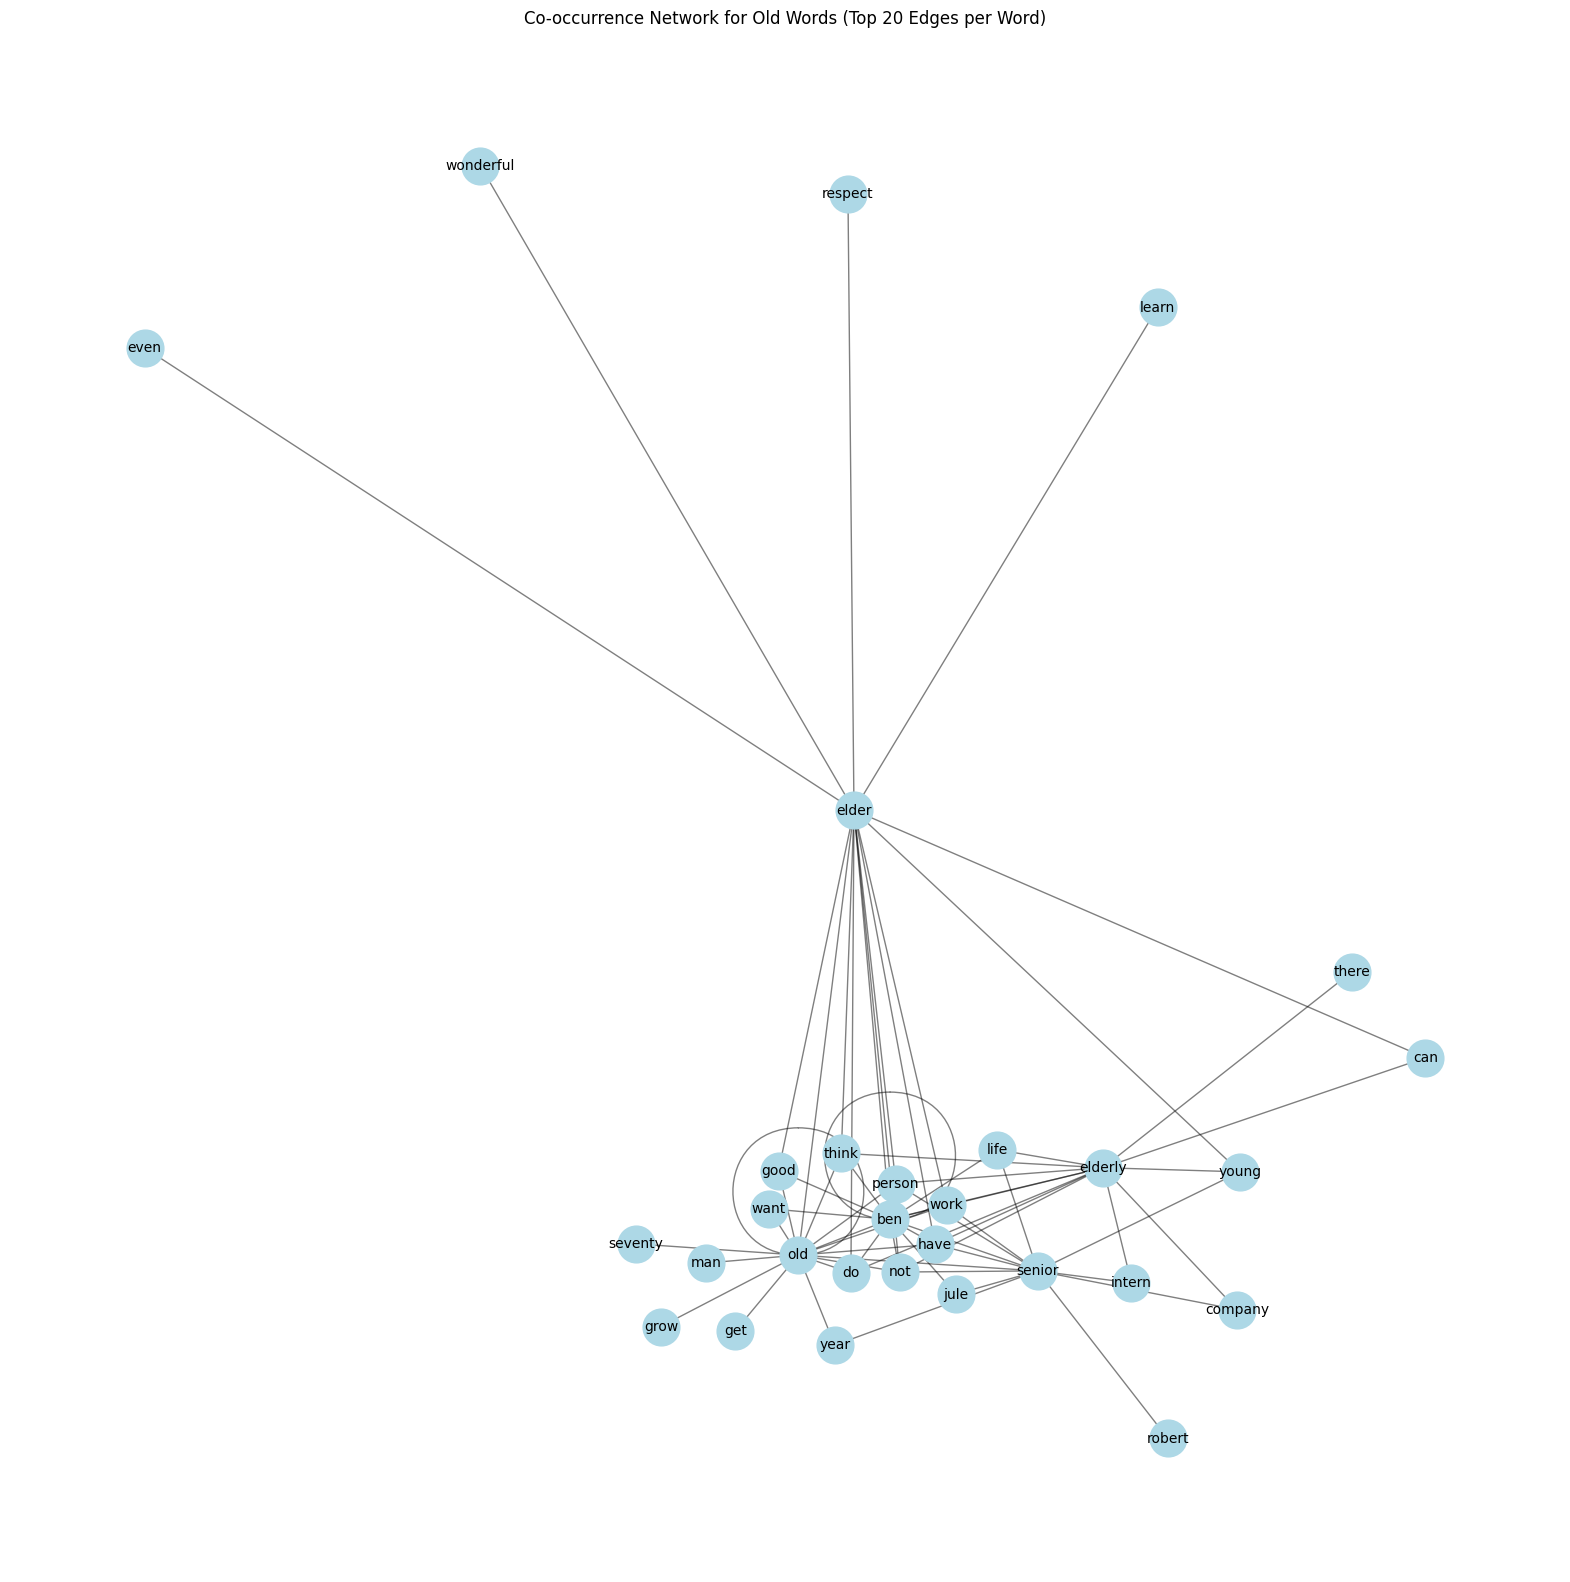

In [113]:
# old_words 관련 서브그래프 시각화
# old_words 관련 서브그래프 시각화
plt.figure(figsize=(20,20))
pos_old_filtered = nx.spring_layout(H_old_filtered, seed=42, k=1)  # k 값을 조정하여 노드 간 거리 조절
nx.draw_networkx_nodes(H_old_filtered, pos_old_filtered, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(H_old_filtered, pos_old_filtered, width=1.0, alpha=0.5)
nx.draw_networkx_labels(H_old_filtered, pos_old_filtered, font_size=10, font_family="sans-serif")  # 폰트 크기 조정
plt.title("Co-occurrence Network for Old Words (Top 20 Edges per Word)")
plt.axis("off")
plt.show()

In [115]:
H_young_filtered = nx.Graph()

for word in young_words:
    # 각 단어에 대해 가중치가 높은 순서로 엣지를 정렬하고, 최대 20개의 엣지만 선택
    edges_for_word = [(u, v, d) for u, v, d in G.edges(data=True) if (u == word or v == word)]
    sorted_edges = sorted(edges_for_word, key=lambda x: x[2]['weight'], reverse=True)[:20]
    H_young_filtered.add_edges_from(sorted_edges)


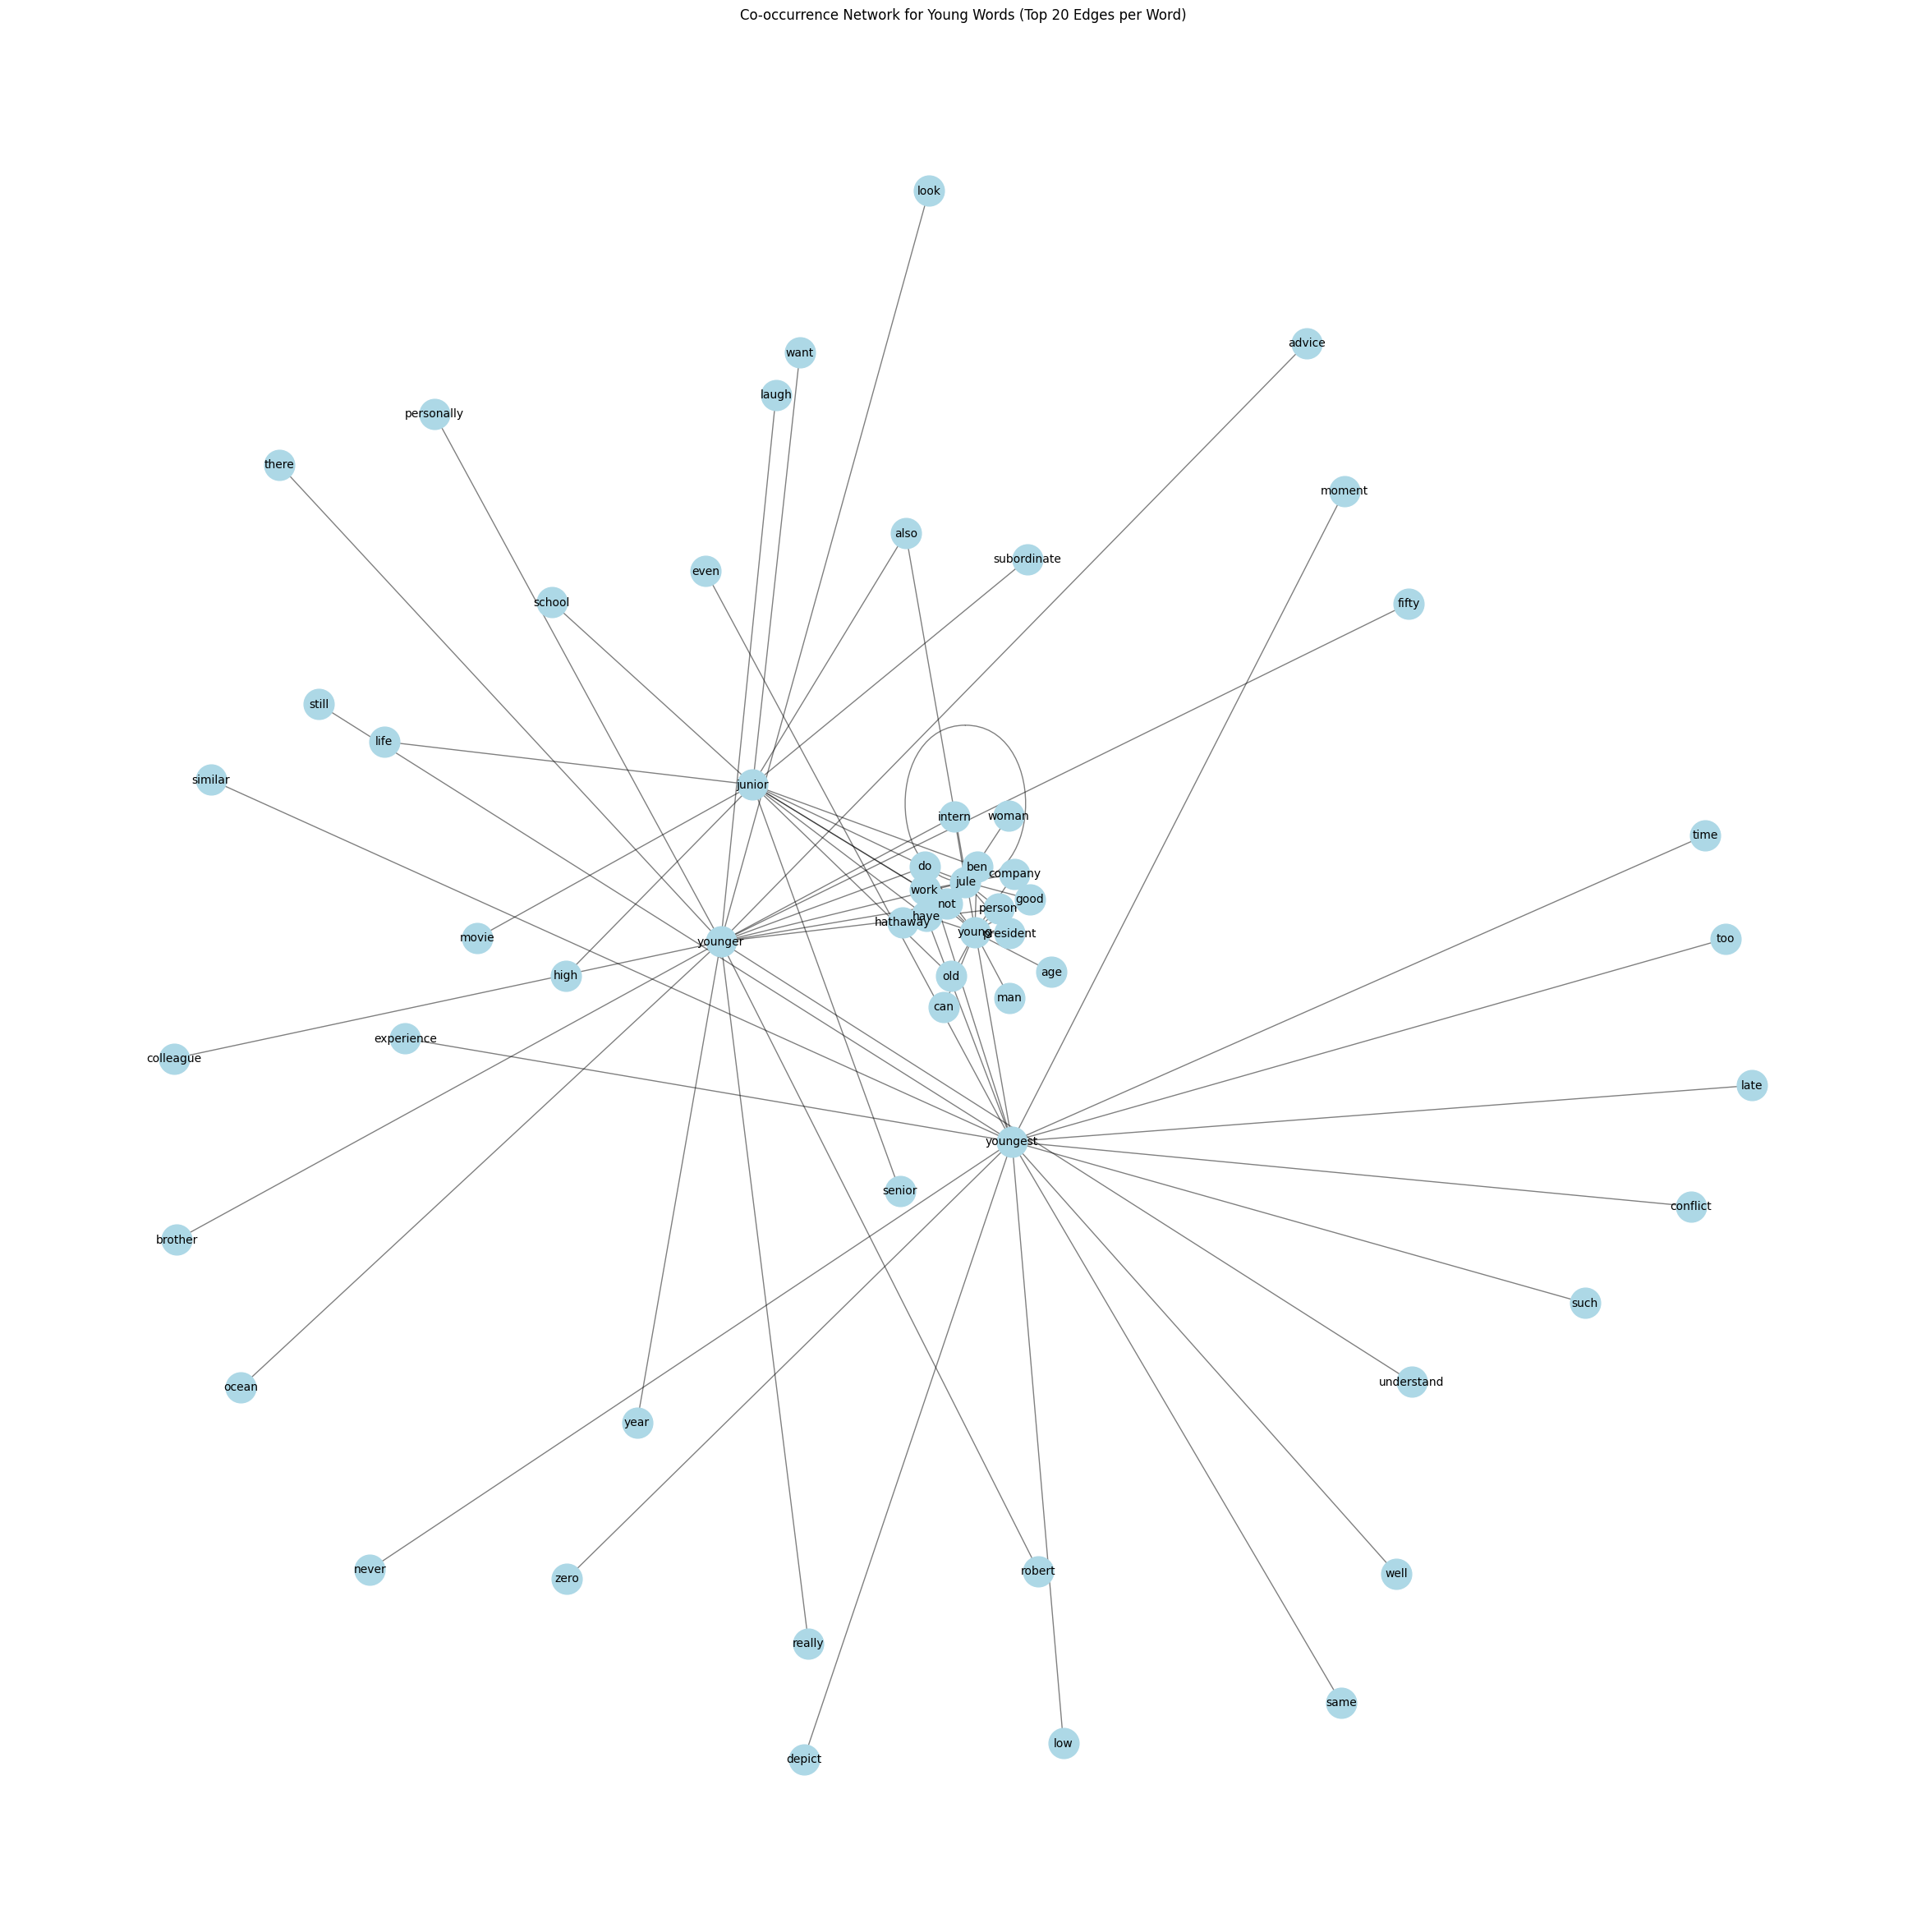

In [119]:
plt.figure(figsize=(30,30))
pos_young_filtered = nx.spring_layout(H_young_filtered, seed=42, k=2)  # k 값을 조정하여 노드 간 거리 조절
nx.draw_networkx_nodes(H_young_filtered, pos_young_filtered, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(H_young_filtered, pos_young_filtered, width=1.0, alpha=0.5)
nx.draw_networkx_labels(H_young_filtered, pos_young_filtered, font_size=10, font_family="sans-serif")  # 폰트 크기 조정
plt.title("Co-occurrence Network for Young Words (Top 20 Edges per Word)")
plt.axis("off")
plt.show()